# Descriptive Analytics of Diabetes Dataset

# 1. Import Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#2. Load the Dataset

In [ ]:
df1 = pd.read_csv('/diabetes.csv')

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#3. Exploratory Data Anaysis

In [ ]:
attributes = ['Pregnancies','GlucosePlasma','BloodPressure','SkinThickness','Insulin','BMI','DPF','Age','Outcome']

In [ ]:
df1.columns = attributes

In [ ]:
df1.dtypes

Pregnancies        int64
GlucosePlasma      int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [ ]:
df1.head()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# Basic statistics
Count,
Mean,
Standard Deviation,
Minimum Value,
25th Percentile,
50th Percentile (Median),
75th Percentile,
Maximum Value.

In [ ]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Univariate analysis

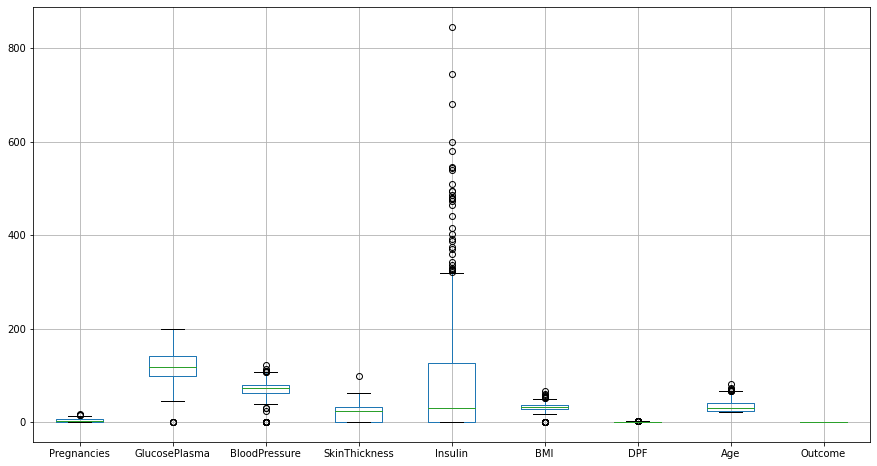

In [ ]:
df1.boxplot(column = attributes, figsize=(15, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d9d5eac0>,
      dtype=object)

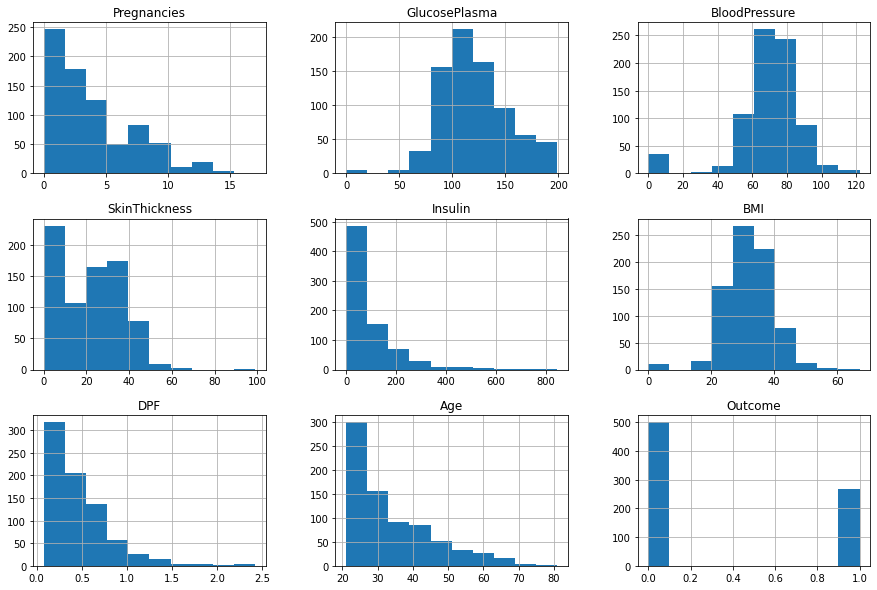

In [ ]:
df1.hist(figsize=(15, 10))

#Multivariate analysis

In [ ]:
df1.shape

(768, 9)

# Data Cleaning -check for duplicate records

In [ ]:
df1.duplicated().sum()

0

Remove duplicate records

In [ ]:
df1 = df1.drop_duplicates()

Count the null values

In [ ]:
df1.isnull().sum()

Pregnancies      0
GlucosePlasma    0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [ ]:
print('No.of zero values in Pregnancies :',df1[df1['Pregnancies']==0].shape[0])

No.of zero values in Pregnancies : 111


# Replace no.of zero values with mean of that columns

In [ ]:
df1['GlucosePlasma']= df1['GlucosePlasma'].replace(0,df1['GlucosePlasma'].mean())
print('No.of zero values in Glucose :',df1[df1['GlucosePlasma']==0].shape[0])

No.of zero values in Glucose : 0


In [ ]:
df1['BloodPressure']= df1['BloodPressure'].replace(0,df1['BloodPressure'].mean())
df1['SkinThickness']= df1['SkinThickness'].replace(0,df1['SkinThickness'].mean())
df1['Insulin']= df1['Insulin'].replace(0,df1['Insulin'].mean())
df1['BMI']=df1['BMI'].replace(0,df1['BMI'].mean())

In [ ]:
df1.describe()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df1.corr()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
GlucosePlasma,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DPF,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


#4.Data Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Outcome Total Values : 768
Negative (0) 500
Positive (1) 268


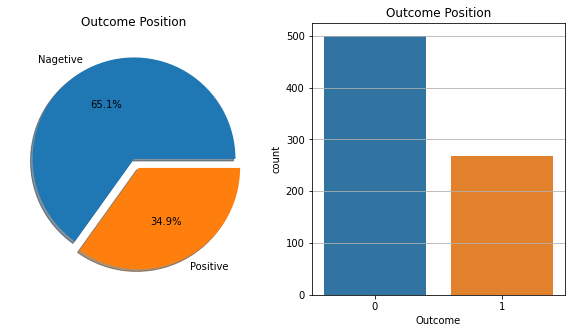

In [ ]:
# Outcome Count Plot
f,ax=plt.subplots(1,2,figsize=(10,5))

mylabels = ['Nagetive','Positive']
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],labels=mylabels ,shadow=True)
ax[0].set_title('Outcome Position')
ax[0].set_ylabel('')

sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome Position')

N,P=df1['Outcome'].value_counts()
print('Outcome Total Values :',df1['Outcome'].value_counts().sum())
print('Negative (0)',N)
print('Positive (1)',P)
plt.grid(axis='y')
plt.show()

#Histograms

Histograms are one of the most common graph used to display numeric data. distribution of the data - whether the data is normally distributed or if it's skewed (to the left or right)

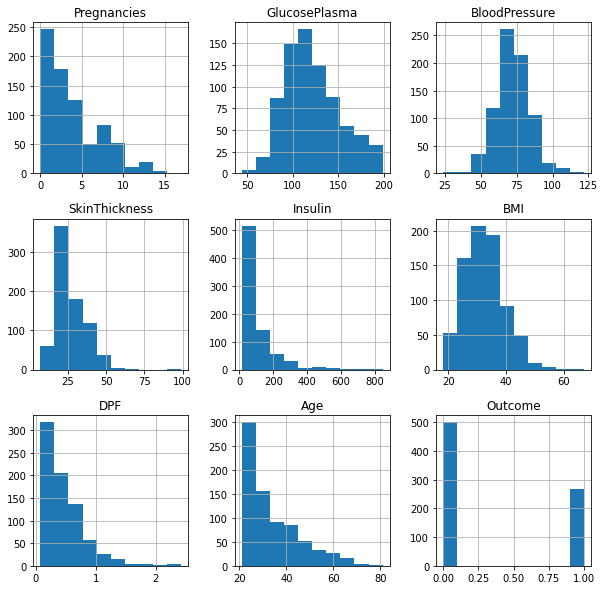

In [ ]:
# Histogram of each feature
df1.hist(bins=10,figsize=(10,10))
plt.show()

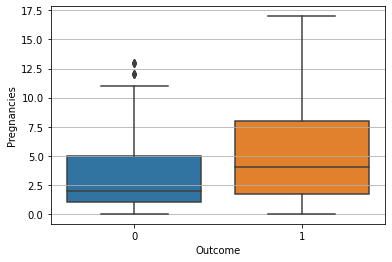

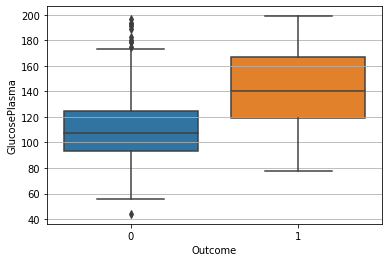

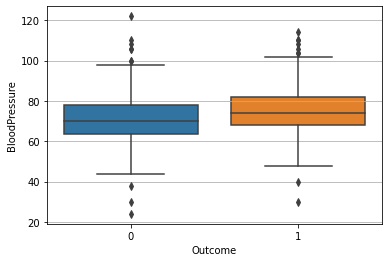

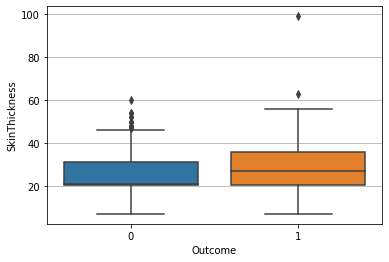

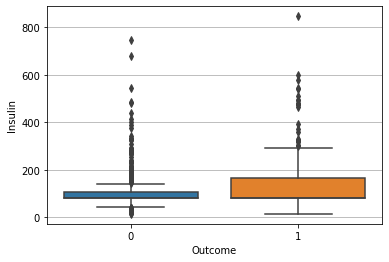

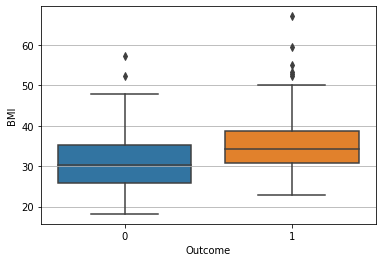

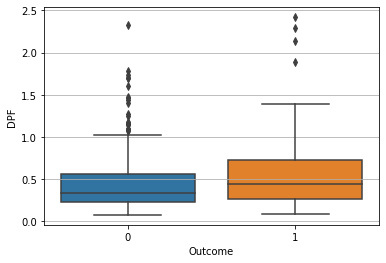

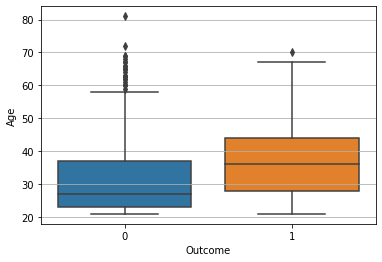

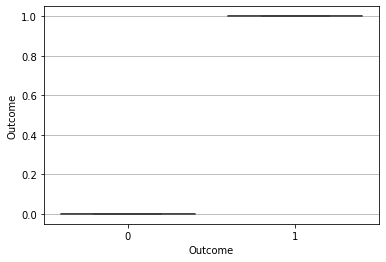

In [ ]:
# Box Plot..

for i in df1.columns:
  sns.boxplot(x='Outcome',y=i,data=df1)
  plt.grid(axis='y')
  plt.show()

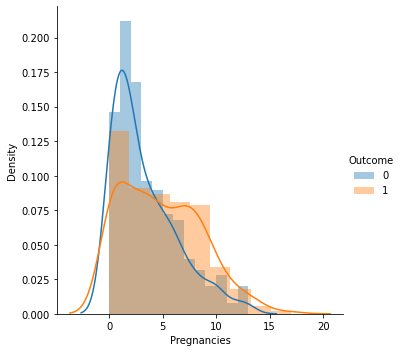

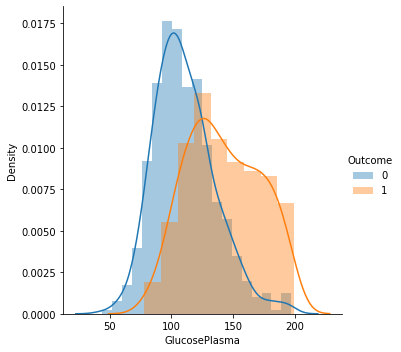

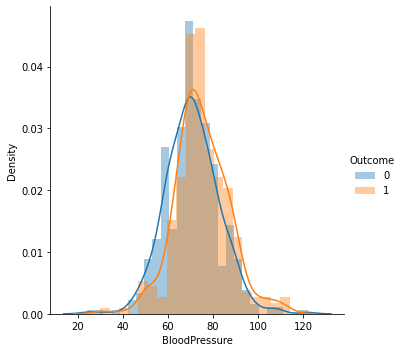

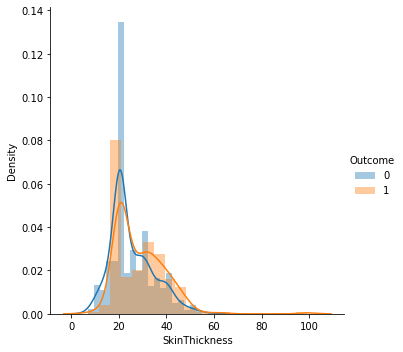

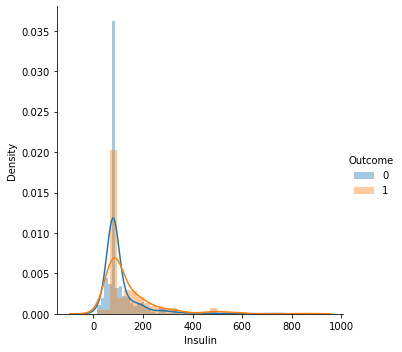

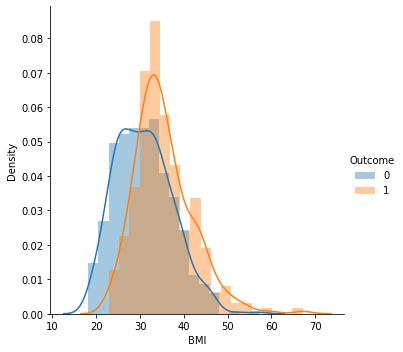

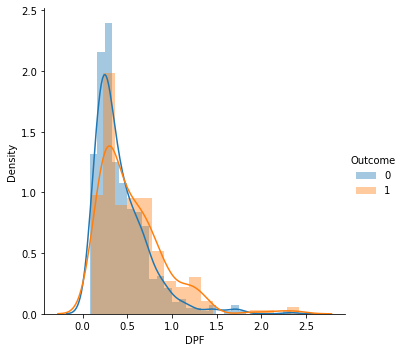

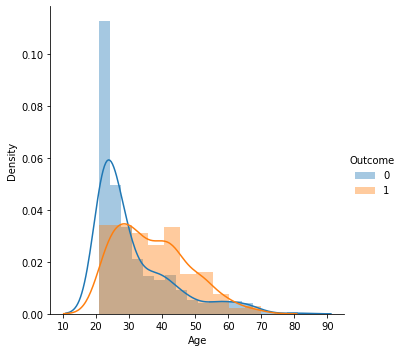

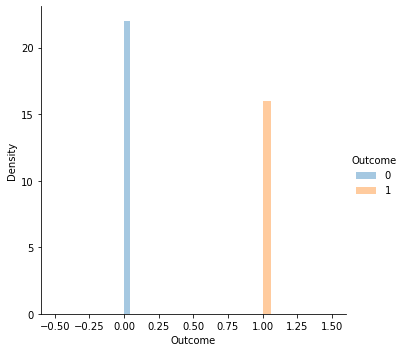

In [ ]:
for i in df1.columns:
  sns.FacetGrid(df1,hue='Outcome', height=5).map(sns.distplot,i).add_legend()
  plt.show()

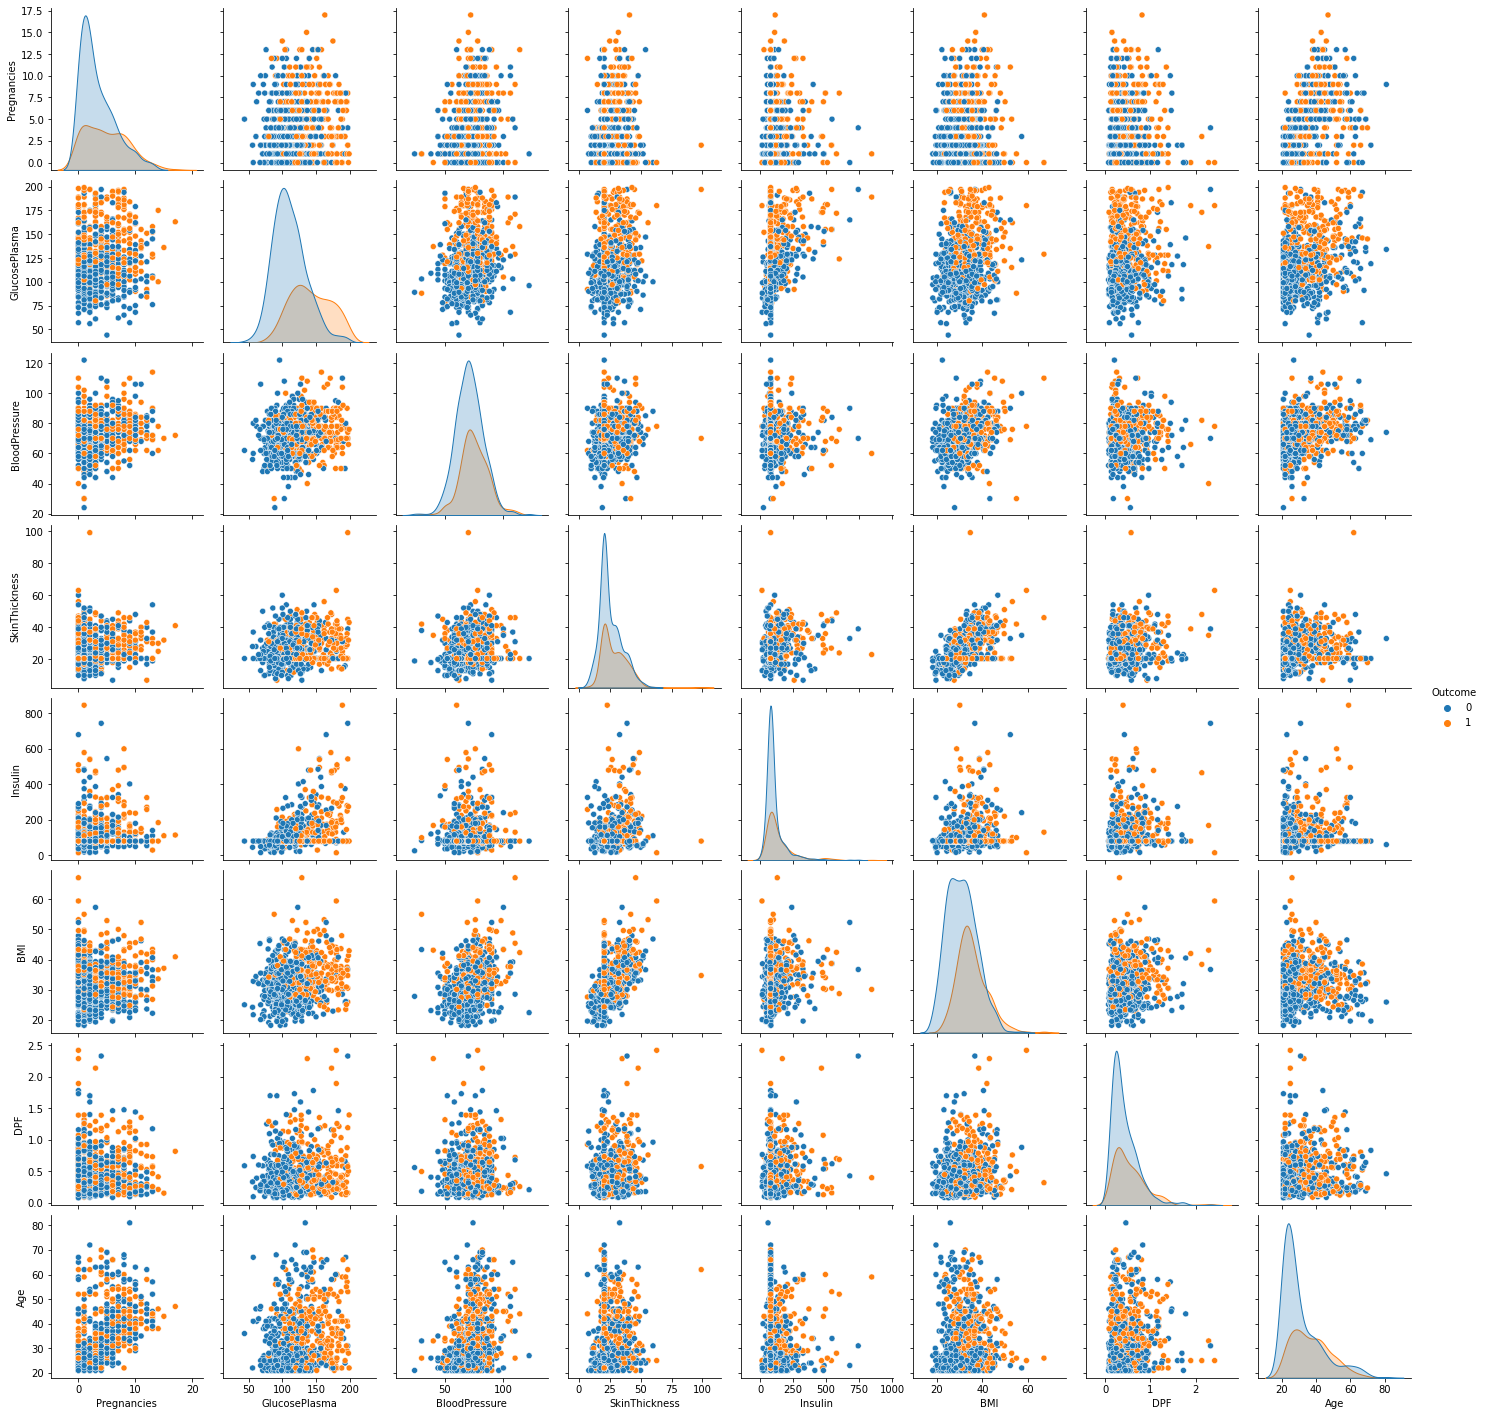

In [ ]:
# Pair Plot
sns.pairplot(data=df1, hue='Outcome')
plt.show()

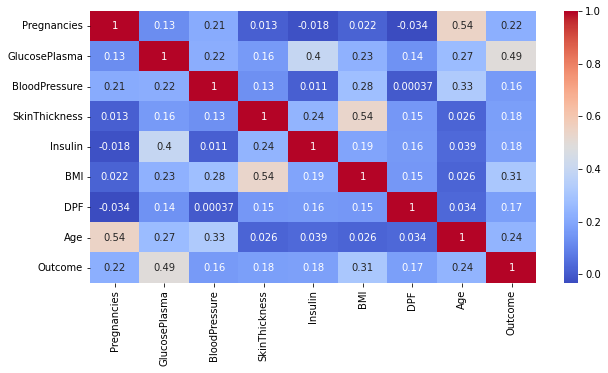

In [ ]:
# Corr Relation dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap='coolwarm')